In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Number of samples and clusters
num_samples  = 40
num_clusters = 2

In [3]:
# Generate random data points
np.random.seed(0)
data = np.random.rand(num_samples, 2)

In [4]:
# Initialize cluster centers
initial_centers = np.random.rand(num_clusters, 2)

In [5]:
# Define a function to compute distances between points and centers
# euclidean distance
def compute_distances(data, centers):
    distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
    return distances

In [6]:
# Define a function to assign samples to the closest cluster
def assign_clusters(distances):
    return np.argmin(distances, axis=0)

In [7]:
# Plot the data points and centers
def plot_clusters(data, centers, assignments):
    plt.figure(figsize=(4,3))
    plt.scatter(data[:, 0], data[:, 1], c=assignments, cmap='viridis', marker='o')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100)
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

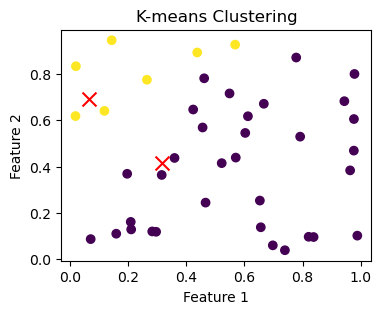

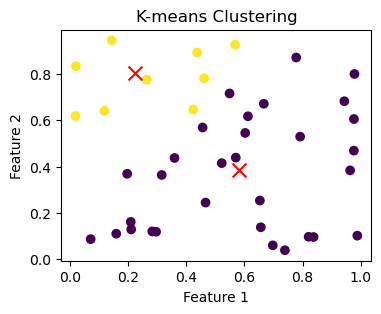

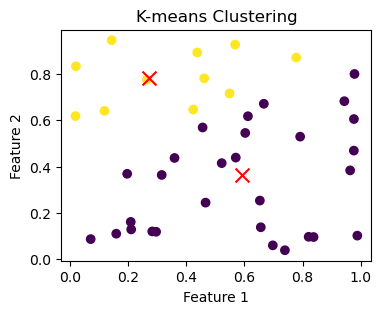

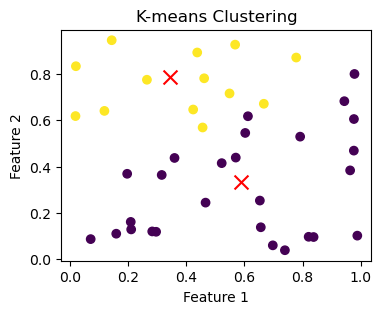

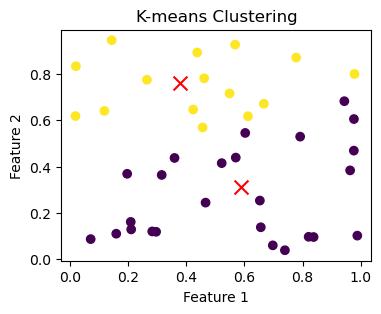

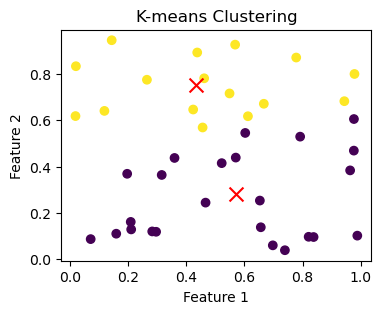

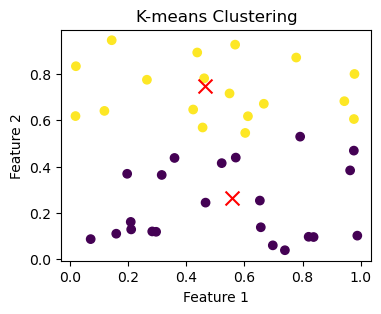

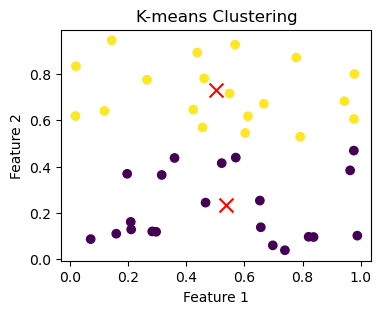

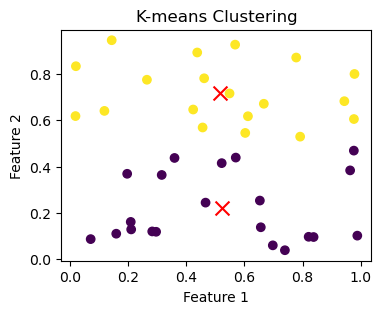

In [8]:
# K-means algorithm
max_iterations = 10
centers = initial_centers
for _ in range(max_iterations):
    distances = compute_distances(data, centers)
    assignments = assign_clusters(distances)
    plot_clusters(data, centers, assignments)
    new_centers = np.array([data[assignments == k].mean(axis=0) for k in range(num_clusters)])
    if np.all(centers == new_centers):
        break
    centers = new_centers

#### Example 2

In [9]:
from sklearn.datasets import make_blobs

In [10]:
# Generate synthetic data with two well-separated clusters
data, _ = make_blobs(n_samples=60, centers=2, )


In [11]:
# Initialize cluster centers randomly
#np.random.seed(42)
initial_centers = data[np.random.choice(len(data), size=2, replace=False)]

In [12]:
# Define a function to assign samples to the closest cluster
def assign_clusters(data, centers):
    distances = np.linalg.norm(data[:, np.newaxis] - centers, axis=2)
    return np.argmin(distances, axis=1)

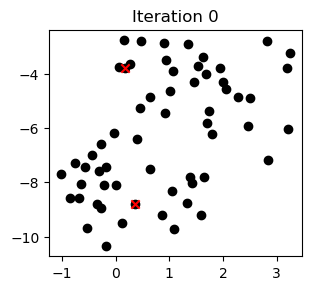

In [13]:
# Plot initial data and centers
plt.figure(figsize=(15, 10))
plt.subplot(3, 4, 1)
plt.scatter(data[:, 0], data[:, 1], c='black', marker='o', label='Data')
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='red', marker='x', label='Centers')
plt.title('Iteration 0');

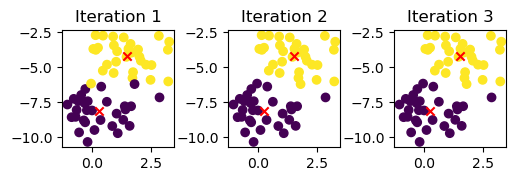

In [14]:
# K-means iterations
for i in range(1, 13):
    plt.subplot(3, 4, i + 1)
    
    # Assign samples to clusters
    labels = assign_clusters(data, initial_centers)
    
    # Compute new cluster centers
    new_centers = np.array([data[labels == j].mean(axis=0) for j in range(2)])
    
    # Plot data and centers
    plt.scatter(data[:, 0], data[:, 1], c=labels, marker='o', cmap='viridis')
    plt.scatter(new_centers[:, 0], new_centers[:, 1], c='red', marker='x', label='Centers')
    plt.title(f'Iteration {i}')
    
    # Break if centers have not changed
    if np.all(initial_centers == new_centers):
        break
    
    initial_centers = new_centers

plt.tight_layout()
plt.show()

#### Example

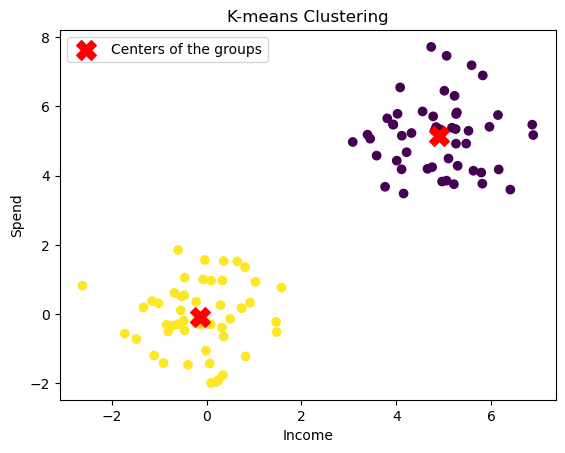

In [15]:
# Import necessary libraries
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, (50, 2)), np.random.normal(5, 1, (50, 2))])

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

# Visualize the clusters
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centers of the groups')
plt.title('K-means Clustering')
plt.xlabel('Income')
plt.ylabel('Spend')
plt.legend()
plt.show()